In [181]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy.optimize import nnls
from mpl_toolkits import mplot3d
from scipy.stats import norm

In [105]:
def quaternion_to_euler(x,y,z,w):
    t0 = +2.0 * (w * x + y * z)
    t1 = +1.0 - 2.0 * (x * x + y * y)
    roll_x = math.degrees(math.atan2(t0, t1))
    
    t2 = +2.0 * (w * y - z * x)
    t2 = +1.0 if t2 > +1.0 else t2
    t2 = -1.0 if t2 < -1.0 else t2
    pitch_y = math.degrees(math.asin(t2))
    
    t3 = +2.0 * (w * z + x * y)
    t4 = +1.0 - 2.0 * (y * y + z * z)
    yaw_z = math.degrees(math.atan2(t3, t4))
    
    return roll_x, pitch_y, yaw_z # in degrees

In [106]:
def load_data(filepath):
    data = {"name": "not_set", "id":[], ".Header.stamp.secs":[], "orientation_x":[], "orientation_y":[], "orientation_z":[], 'orientation_w':[], "roll":[],"pitch":[],"yaw":[], 
	 "angular_velocity_x":[], "angular_velocity_y":[], "angular_velocity_z":[], "linear_velocity_x":[], "linear_velocity_y":[], "linear_velocity_z":[], "magnetic_field_x":[],"magnetic_field_y":[],"magnetic_field_z":[]}
    with open(filepath, "r") as file:
        next(file)
        lines = csv.reader(file, delimiter = ",")
        for i, row in enumerate(lines):
            r,p,y = quaternion_to_euler(float(row[7]),float(row[8]), float(row[9]), float(row[10]))
            data["id"].append(i)
            data[".Header.stamp.secs"].append(row[2])
            data["orientation_x"].append(float(row[7]))
            data["orientation_y"].append(float(row[8]))
            data["orientation_z"].append(float(row[9]))
            data["orientation_w"].append(float(row[10]))
            data["roll"].append(float(r))
            data["pitch"].append(float(p))
            data["yaw"].append(float(y))
            data["angular_velocity_x"].append(float(row[20]))
            data["angular_velocity_y"].append(float(row[21]))
            data["angular_velocity_z"].append(float(row[22]))
            data["linear_velocity_x"].append(float(row[32]))
            data["linear_velocity_y"].append(float(row[33]))
            data["linear_velocity_z"].append(float(row[34]))
            data["magnetic_field_x"].append(float(row[47]))
            data["magnetic_field_y"].append(float(row[48]))
            data["magnetic_field_z"].append(float(row[49]))


        data["id"] = np.asarray(data["id"])
        data[".Header.stamp.secs"] = np.asarray(data[".Header.stamp.secs"], dtype='float64')
        data["orientation_x"] = np.asarray(data["orientation_x"], dtype = 'float64')
        data["orientation_y"] = np.asarray(data["orientation_y"], dtype = 'float64')
        data["orientation_z"] = np.asarray(data["orientation_z"], dtype = 'float64')
        data["orientation_w"] = np.asarray(data["orientation_w"], dtype = 'float64')
        data["roll"] = np.asarray(data["roll"], dtype = 'float64')
        data["pitch"] = np.asarray(data["pitch"], dtype = 'float64')
        data["yaw"] = np.asarray(data["yaw"], dtype = 'float64')
        data["angular_velocity_x"] = np.asarray(data["angular_velocity_x"], dtype = 'float64')
        data["angular_velocity_y"] = np.asarray(data["angular_velocity_y"], dtype = 'float64')
        data["angular_velocity_z"] = np.asarray(data["angular_velocity_z"], dtype = 'float64')
        data["linear_velocity_x"] = np.asarray(data["linear_velocity_x"], dtype = 'float64')
        data["linear_velocity_y"] = np.asarray(data["linear_velocity_y"], dtype = 'float64')
        data["linear_velocity_z"] = np.asarray(data["linear_velocity_z"], dtype = 'float64')
        data["magnetic_field_x"] = np.asarray(data["magnetic_field_x"], dtype = 'float64')
        data["magnetic_field_y"] = np.asarray(data["magnetic_field_y"], dtype = 'float64')
        data["magnetic_field_z"] = np.asarray(data["magnetic_field_z"], dtype = 'float64')


    return data

In [112]:
def load_group_data(filepath):
    data = {"name": "not_set", "id":[], ".Header.stamp.secs":[], ".imu.orientation.x":[], ".imu.orientation.y":[], ".imu.orientation.z":[], '.imu.orientation.w':[], "roll":[],"pitch":[],"yaw":[], 
	 ".imu.angular_velocity.x":[], ".imu.angular_velocity.y":[], ".imu.angular_velocity.z":[], ".imu.linear_accelaration.x":[], ".imu.linear_accelaration.y":[], ".imu.linear_accelaration.z":[], ".mag_field.magnetic_field.x":[],".mag_field.magnetic_field.y":[],".mag_field.magnetic_field.z":[]}
    with open(filepath, "r") as file:
        next(file)
        lines = csv.reader(file, delimiter = ",")
        for i, row in enumerate(lines):
            r,p,y = quaternion_to_euler(float(row[9]),float(row[10]), float(row[11]), float(row[12]))
            data["id"].append(i)
            data[".Header.stamp.secs"].append(row[2])
            data[".imu.orientation.x"].append(float(row[9]))
            data[".imu.orientation.y"].append(float(row[10]))
            data[".imu.orientation.z"].append(float(row[11]))
            data[".imu.orientation.w"].append(float(row[12]))
            data["roll"].append(float(r))
            data["pitch"].append(float(p))
            data["yaw"].append(float(y))
            data[".imu.angular_velocity.x"].append(float(row[14]))
            data[".imu.angular_velocity.y"].append(float(row[15]))
            data[".imu.angular_velocity.z"].append(float(row[16]))
            data[".imu.linear_accelaration.x"].append(float(row[18]))
            data[".imu.linear_accelaration.y"].append(float(row[19]))
            data[".imu.linear_accelaration.z"].append(float(row[20]))
            data[".mag_field.magnetic_field.x"].append(float(row[26]))
            data[".mag_field.magnetic_field.y"].append(float(row[27]))
            data[".mag_field.magnetic_field.z"].append(float(row[28]))


        data["id"] = np.asarray(data["id"])
        data[".Header.stamp.secs"] = np.asarray(data[".Header.stamp.secs"], dtype='float64')
        data[".imu.orientation.x"] = np.asarray(data[".imu.orientation.x"], dtype = 'float64')
        data[".imu.orientation.y"] = np.asarray(data[".imu.orientation.y"], dtype = 'float64')
        data[".imu.orientation.z"] = np.asarray(data[".imu.orientation.z"], dtype = 'float64')
        data[".imu.orientation.w"] = np.asarray(data[".imu.orientation.w"], dtype = 'float64')
        data["roll"] = np.asarray(data["roll"], dtype = 'float64')
        data["pitch"] = np.asarray(data["pitch"], dtype = 'float64')
        data["yaw"] = np.asarray(data["yaw"], dtype = 'float64')
        data[".imu.angular_velocity.x"] = np.asarray(data[".imu.angular_velocity.x"], dtype = 'float64')
        data[".imu.angular_velocity.y"] = np.asarray(data[".imu.angular_velocity.y"], dtype = 'float64')
        data[".imu.angular_velocity.z"] = np.asarray(data[".imu.angular_velocity.z"], dtype = 'float64')
        data[".imu.linear_accelaration.x"] = np.asarray(data[".imu.linear_accelaration.x"], dtype = 'float64')
        data[".imu.linear_accelaration.y"] = np.asarray(data[".imu.linear_accelaration.y"], dtype = 'float64')
        data[".imu.linear_accelaration.z"] = np.asarray(data[".imu.linear_accelaration.z"], dtype = 'float64')
        data[".mag_field.magnetic_field.x"] = np.asarray(data[".mag_field.magnetic_field.x"], dtype = 'float64')
        data[".mag_field.magnetic_field.y"] = np.asarray(data[".mag_field.magnetic_field.y"], dtype = 'float64')
        data[".mag_field.magnetic_field.z"] = np.asarray(data[".mag_field.magnetic_field.z"], dtype = 'float64')


    return data

In [135]:
def five_hr_data(filepath):
    data = {"name": "not_set", "id":[], ".Header.stamp.secs":[],"roll":[],"pitch":[],"yaw":[], "angular_velocity_x":[], "angular_velocity_y":[], "angular_velocity_z":[], "linear_velocity_x":[], "linear_velocity_y":[], "linear_velocity_z":[], "magnetic_field_x":[],"magnetic_field_y":[],"magnetic_field_z":[]}
    with open(filepath, "r") as file:
        next(file)
        lines = csv.reader(file, delimiter = ",")
        for i, row in enumerate(lines):
            if '' not in row:
                data["id"].append(i)
                data[".Header.stamp.secs"].append(row[1])
                data["roll"].append(row[7])
                data["pitch"].append(row[5])
                data["yaw"].append(row[6])
                data["angular_velocity_x"].append(float(row[14]))
                data["angular_velocity_y"].append(float(row[15]))
                data["angular_velocity_z"].append(float(row[16][:-3]))
                data["linear_velocity_x"].append(float(row[11]))
                data["linear_velocity_y"].append(float(row[12]))
                data["linear_velocity_z"].append(float(row[13]))
                data["magnetic_field_x"].append(float(row[8]))
                data["magnetic_field_y"].append(float(row[9]))
                data["magnetic_field_z"].append(float(row[10]))


        data["id"] = np.asarray(data["id"])
        data[".Header.stamp.secs"] = np.asarray(data[".Header.stamp.secs"], dtype='float64')
        data["roll"] = np.asarray(data["roll"], dtype = 'float64')
        data["pitch"] = np.asarray(data["pitch"], dtype = 'float64')
        data["yaw"] = np.asarray(data["yaw"], dtype = 'float64')
        data["angular_velocity_x"] = np.asarray(data["angular_velocity_x"], dtype = 'float64')
        data["angular_velocity_y"] = np.asarray(data["angular_velocity_y"], dtype = 'float64')
        data["angular_velocity_z"] = np.asarray(data["angular_velocity_z"], dtype = 'float64')
        data["linear_velocity_x"] = np.asarray(data["linear_velocity_x"], dtype = 'float64')
        data["linear_velocity_y"] = np.asarray(data["linear_velocity_y"], dtype = 'float64')
        data["linear_velocity_z"] = np.asarray(data["linear_velocity_z"], dtype = 'float64')
        data["magnetic_field_x"] = np.asarray(data["magnetic_field_x"], dtype = 'float64')
        data["magnetic_field_y"] = np.asarray(data["magnetic_field_y"], dtype = 'float64')
        data["magnetic_field_z"] = np.asarray(data["magnetic_field_z"], dtype = 'float64')


    return data

In [136]:
five_hr = five_hr_data("/home/ubuntu20_04/EECE5554/LAB3/src/Analysis/csv_files/LocationA.csv")

In [119]:
stationary_data = load_data("/home/ubuntu20_04/EECE5554/LAB3/src/Analysis/csv_files/5_min.csv")

In [113]:
group_data = load_group_data("/home/ubuntu20_04/EECE5554/LAB3/src/Analysis/csv_files/group_data.csv")

# gyro xyz time series

Mean of gyroscope x-axis: -1.4320139301792239e-05
Standard Deviation of gyroscope x-axis: 0.0031666708023529045
Mean of gyroscope y-axis: 2.4761403210736432e-05
Standard Deviation of gyroscope y-axis: 0.003498546570224998
Mean of gyroscope z-axis: 4.40032277244543e-06
Standard Deviation of gyroscope z-axis: 0.0013648489423909284


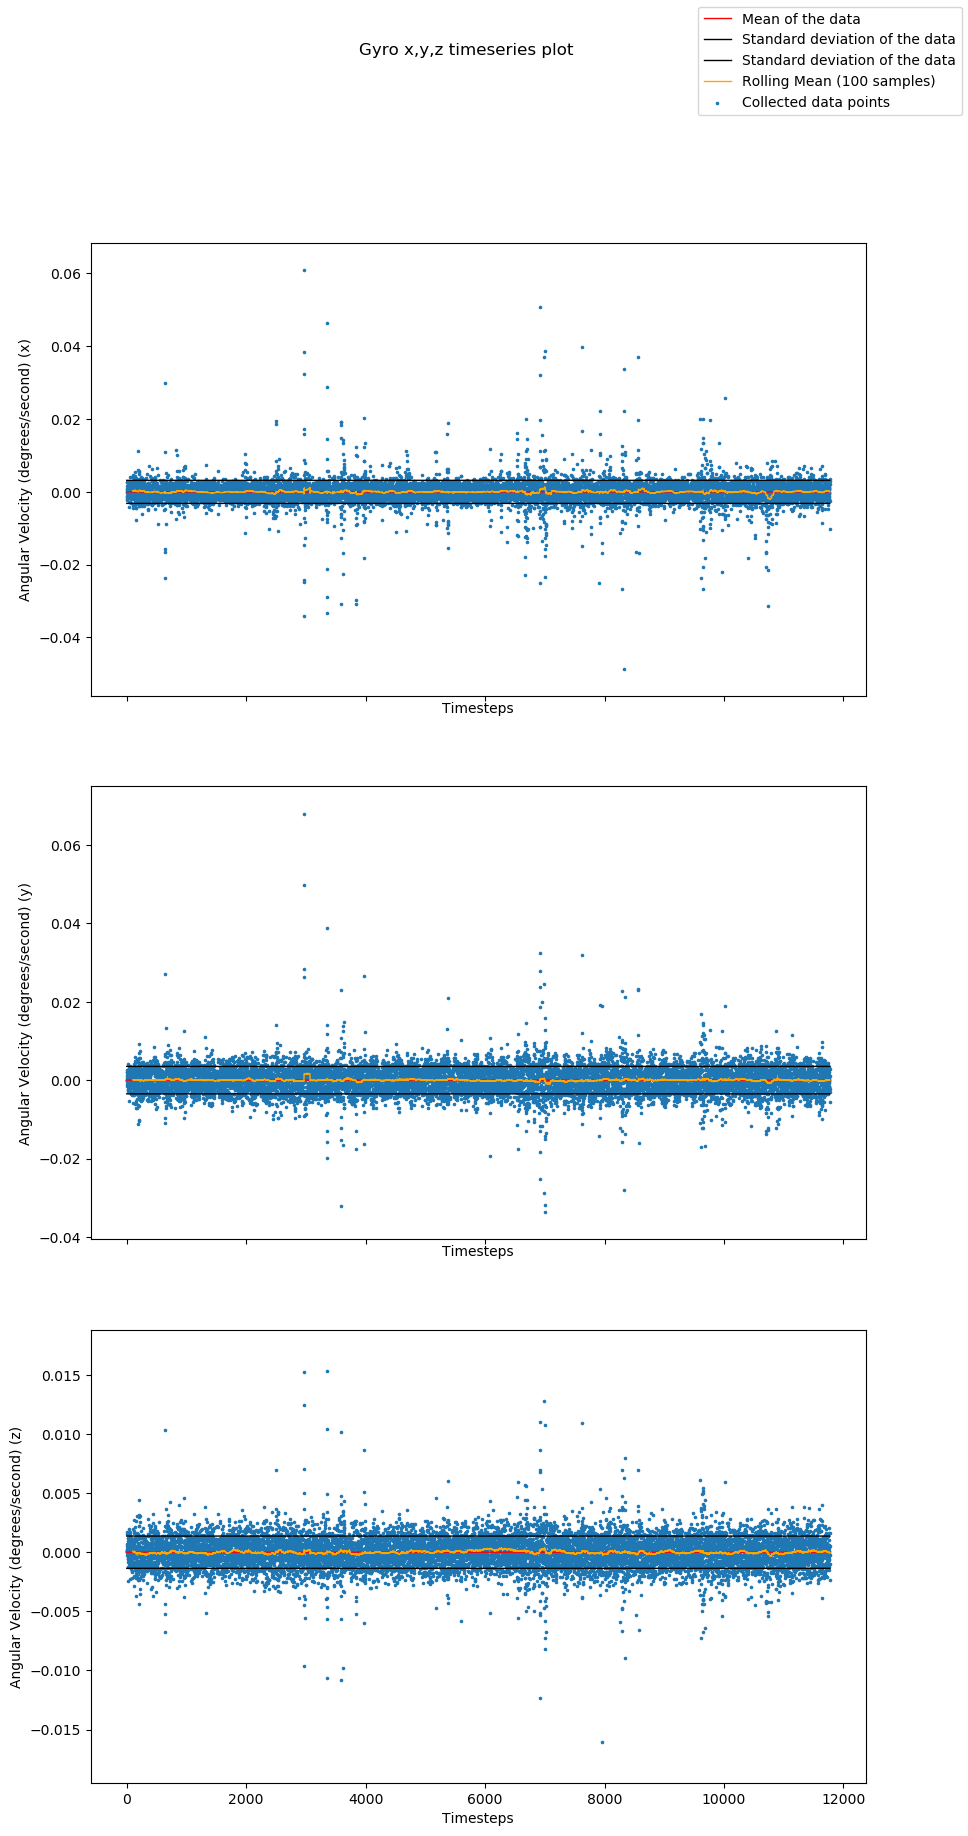

In [179]:
X = stationary_data["id"]
Y_x = stationary_data["angular_velocity_x"]
Y_y = stationary_data["angular_velocity_y"]
Y_z = stationary_data["angular_velocity_z"]

Y_mean_x = np.mean(Y_x)*np.ones(np.shape(X))
Y_std_x = np.std(Y_x)

Y_mean_y = np.mean(Y_y)*np.ones(np.shape(X))
Y_std_y = np.std(Y_y)

Y_mean_z = np.mean(Y_z)*np.ones(np.shape(X))
Y_std_z = np.std(Y_z)


N = len(X)
Y_meanx2 = pd.Series(Y_x).rolling(window=100).mean().values
Y_meany2 = pd.Series(Y_y).rolling(window=100).mean().values
Y_meanz2 = pd.Series(Y_z).rolling(window=100).mean().values


# print("Median of accelerometer x-axis: %s"%Y_median_x)
print("Mean of gyroscope x-axis: %s"%Y_mean_x[0])
print("Standard Deviation of gyroscope x-axis: %s"%Y_std_x)
print("Mean of gyroscope y-axis: %s"%Y_mean_y[0])
print("Standard Deviation of gyroscope y-axis: %s"%Y_std_y)

print("Mean of gyroscope z-axis: %s"%Y_mean_z[0])
print("Standard Deviation of gyroscope z-axis: %s"%Y_std_z)


fig, axs = plt.subplots(3, sharex=True, sharey=False,figsize=(10,20))

fig.suptitle('Gyro x,y,z timeseries plot')


axs[0].scatter(X,Y_x, marker='.', s=10, label="Collected data points")
axs[0].plot(X, Y_mean_x, color='r', lw=1, label="Mean of the data")
axs[0].plot(X, Y_mean_x+Y_std_x, color='k', lw=1, label="Standard deviation of the data")
axs[0].plot(X, Y_mean_x-Y_std_x, color='k', lw=1, label="Standard deviation of the data")
axs[0].plot(X, Y_meanx2, color='orange', lw=1, label="Rolling Mean (100 samples)")


axs[1].scatter(X,Y_y, marker='.', s=10, label="Collected data points")
axs[1].plot(X, Y_mean_y, color='r', lw=1, label="Mean of the data")
axs[1].plot(X, Y_mean_y+Y_std_y, color='k', lw=1, label="Standard deviation of the data")
axs[1].plot(X, Y_mean_y-Y_std_y, color='k', lw=1, label="Standard deviation of the data")
axs[1].plot(X, Y_meany2, color='orange', lw=1, label="Rolling Mean (100 samples)")


axs[2].scatter(X,Y_z, marker='.', s=10, label="Collected data points")
axs[2].plot(X, Y_mean_z, color='r', lw=1, label="Mean of the data")
axs[2].plot(X, Y_mean_z+Y_std_z, color='k', lw=1, label="Standard deviation of the data")
axs[2].plot(X, Y_mean_z-Y_std_z, color='k', lw=1, label="Standard deviation of the data")
axs[2].plot(X, Y_meanz2, color='orange', lw=1, label="Rolling Mean (100 samples)")


axs[0].set_xlabel("Timesteps")
axs[1].set_xlabel("Timesteps")
axs[2].set_xlabel("Timesteps")
axs[0].set_ylabel("Angular Velocity (degrees/second) (x)")
axs[1].set_ylabel("Angular Velocity (degrees/second) (y)")
axs[2].set_ylabel("Angular Velocity (degrees/second) (z)")

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

In [188]:
Y_y

array([ 0.002529, -0.001421, -0.00088 , ..., -0.005574,  0.001159,
       -0.002975])

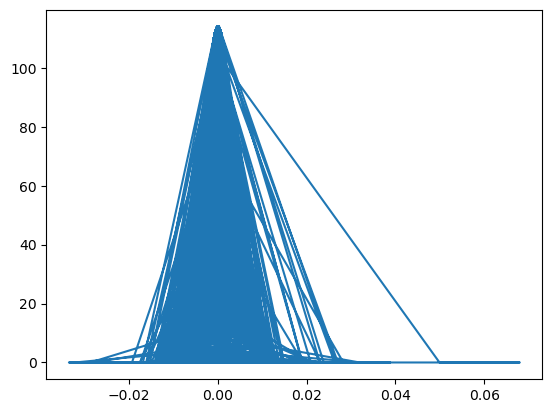

In [186]:
plt.plot(Y_y, norm.pdf(Y_y, Y_mean_y, Y_std_y))
plt.show()

# Accelaration x,y,z

Median of accelerometer x-axis: -1.715
Mean of accelerometer x-axis: -1.7147163849486111
Standard Deviation of accelerometer x-axis: 0.017568131947244953


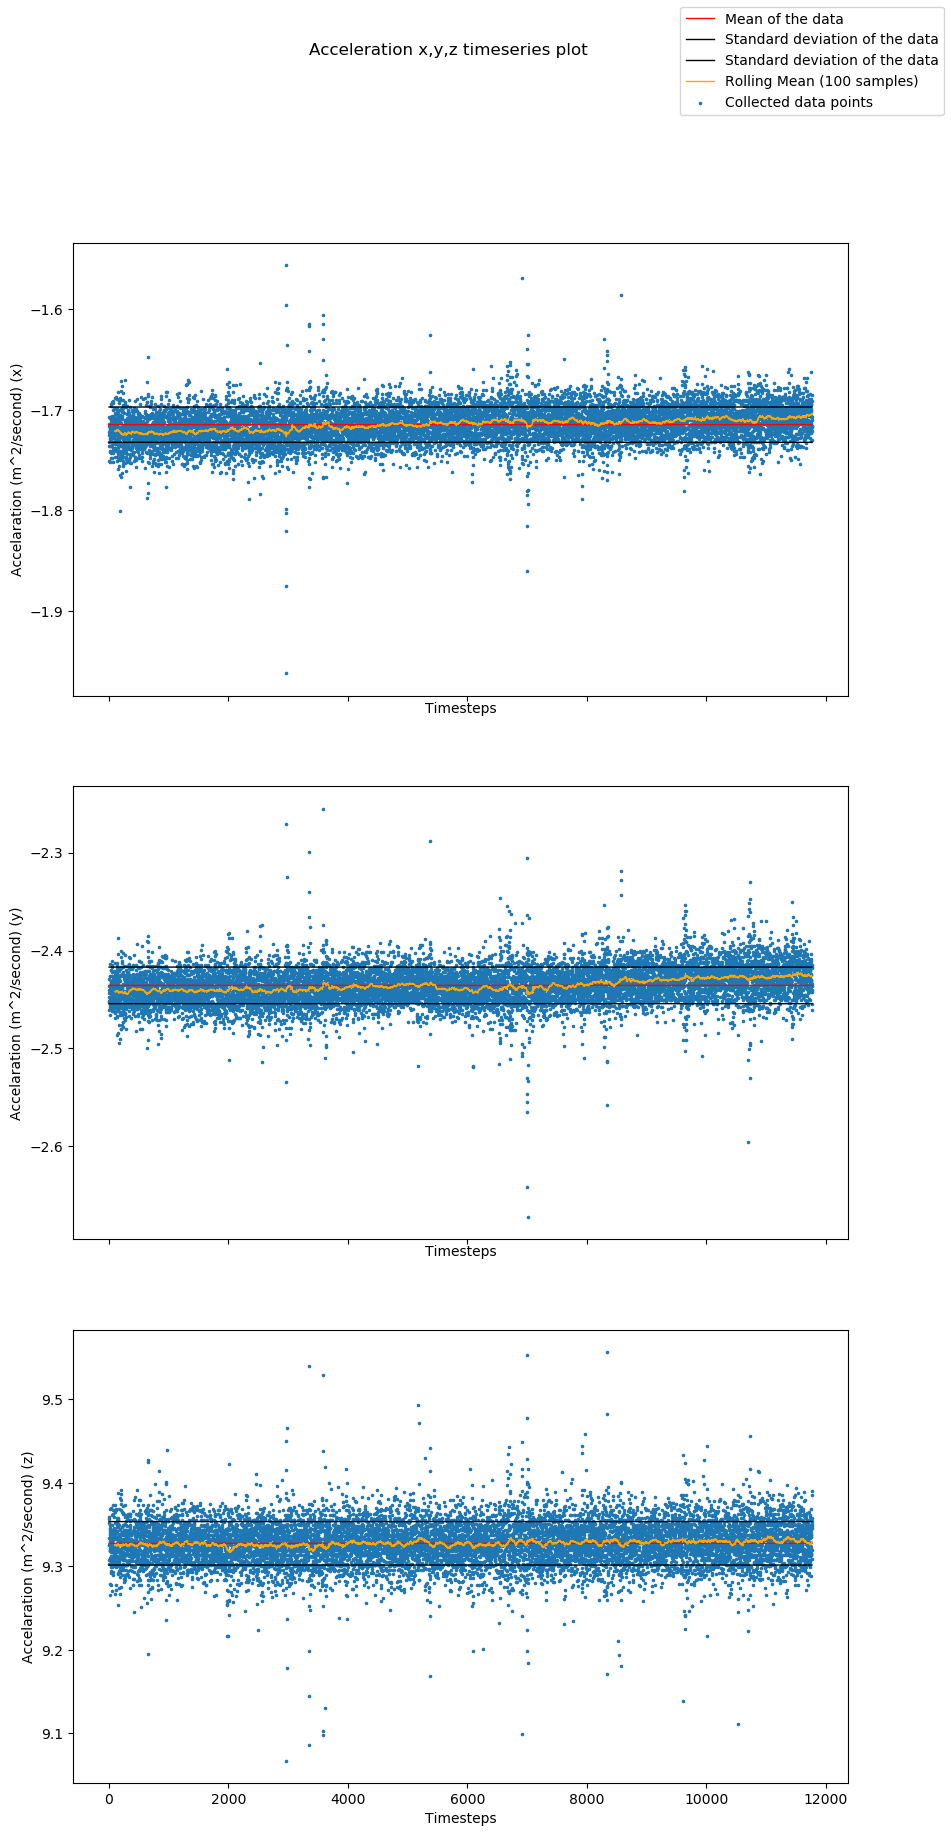

In [191]:
X = stationary_data["id"]
Y_x = stationary_data["linear_velocity_x"]
Y_y = stationary_data["linear_velocity_y"]
Y_z = stationary_data["linear_velocity_z"]

Y_mean_x = np.mean(Y_x)*np.ones(np.shape(X))
Y_std_x = np.std(Y_x)
Y_median_x = np.median(Y_x)


print("Median of accelerometer x-axis: %s"%Y_median_x)
print("Mean of accelerometer x-axis: %s"%Y_mean_x[0])
print("Standard Deviation of accelerometer x-axis: %s"%Y_std_x)

Y_mean_y = np.mean(Y_y)*np.ones(np.shape(X))
Y_std_y = np.std(Y_y)

Y_mean_z = np.mean(Y_z)*np.ones(np.shape(X))
Y_std_z = np.std(Y_z)


N = len(X)
Y_meanx2 = pd.Series(Y_x).rolling(window=100).mean().values
Y_meany2 = pd.Series(Y_y).rolling(window=100).mean().values
Y_meanz2 = pd.Series(Y_z).rolling(window=100).mean().values


fig, axs = plt.subplots(3, sharex=True, sharey=False,figsize=(10,20))

fig.suptitle('Acceleration x,y,z timeseries plot')


axs[0].scatter(X,Y_x, marker='.', s=10, label="Collected data points")
axs[0].plot(X, Y_mean_x, color='r', lw=1, label="Mean of the data")
axs[0].plot(X, Y_mean_x+Y_std_x, color='k', lw=1, label="Standard deviation of the data")
axs[0].plot(X, Y_mean_x-Y_std_x, color='k', lw=1, label="Standard deviation of the data")
axs[0].plot(X, Y_meanx2, color='orange', lw=1, label="Rolling Mean (100 samples)")


axs[1].scatter(X,Y_y, marker='.', s=10, label="Collected data points")
axs[1].plot(X, Y_mean_y, color='r', lw=1, label="Mean of the data")
axs[1].plot(X, Y_mean_y+Y_std_y, color='k', lw=1, label="Standard deviation of the data")
axs[1].plot(X, Y_mean_y-Y_std_y, color='k', lw=1, label="Standard deviation of the data")
axs[1].plot(X, Y_meany2, color='orange', lw=1, label="Rolling Mean (100 samples)")


axs[2].scatter(X,Y_z, marker='.', s=10, label="Collected data points")
axs[2].plot(X, Y_mean_z, color='r', lw=1, label="Mean of the data")
axs[2].plot(X, Y_mean_z+Y_std_z, color='k', lw=1, label="Standard deviation of the data")
axs[2].plot(X, Y_mean_z-Y_std_z, color='k', lw=1, label="Standard deviation of the data")
axs[2].plot(X, Y_meanz2, color='orange', lw=1, label="Rolling Mean (100 samples)")


axs[0].set_xlabel("Timesteps")
axs[1].set_xlabel("Timesteps")
axs[2].set_xlabel("Timesteps")
axs[0].set_ylabel("Accelaration (m^2/second) (x)")
axs[1].set_ylabel("Accelaration (m^2/second) (y)")
axs[2].set_ylabel("Accelaration (m^2/second) (z)")

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

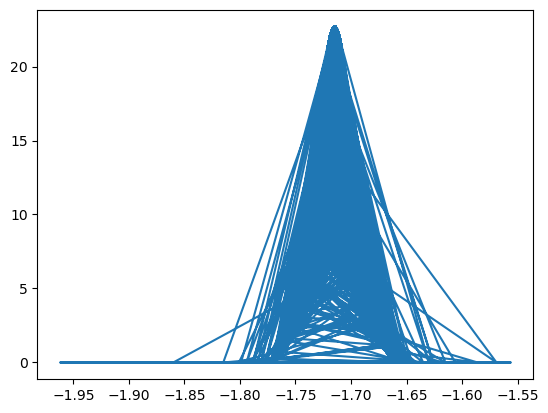

In [192]:
plt.plot(Y_x, norm.pdf(Y_x, Y_mean_x, Y_std_x))
plt.show()

In [103]:
# print("Median of accelerometer x-axis: %s"%Y_median_y)
print("Mean of accelerometer x-axis: %s"%Y_mean_y[0])
print("Standard Deviation of accelerometer x-axis: %s"%Y_std_z)

Mean of accelerometer x-axis: -2.435575978934851
Standard Deviation of accelerometer x-axis: 0.026045020500117755


In [ ]:
X = stationary_data["id"]
Y_x = stationary_data["roll"]
Y_y = stationary_data["pitch"]
Y_z = stationary_data["yaw"]

Y_mean_x = np.mean(Y_x)*np.ones(np.shape(X))
Y_std_x = np.std(Y_x)

Y_mean_y = np.mean(Y_y)*np.ones(np.shape(X))
Y_std_y = np.std(Y_y)

Y_mean_z = np.mean(Y_z)*np.ones(np.shape(X))
Y_std_z = np.std(Y_z)


N = len(X)
Y_meanx2 = pd.Series(Y_x).rolling(window=100).mean().values
Y_meany2 = pd.Series(Y_y).rolling(window=100).mean().values
Y_meanz2 = pd.Series(Y_z).rolling(window=100).mean().values


fig, axs = plt.subplots(3, sharex=True, sharey=False,figsize=(10,20))

fig.suptitle('Acceleration x,y,z timeseries plot')


axs[0].scatter(X,Y_x, marker='.', s=10, label="Collected data points")
axs[0].plot(X, Y_mean_x, color='r', lw=1, label="Mean of the data")
axs[0].plot(X, Y_mean_x+Y_std_x, color='k', lw=1, label="Standard deviation of the data")
axs[0].plot(X, Y_mean_x-Y_std_x, color='k', lw=1, label="Standard deviation of the data")
axs[0].plot(X, Y_meanx2, color='orange', lw=1, label="Rolling Mean (100 samples)")


axs[1].scatter(X,Y_y, marker='.', s=10, label="Collected data points")
axs[1].plot(X, Y_mean_y, color='r', lw=1, label="Mean of the data")
axs[1].plot(X, Y_mean_y+Y_std_y, color='k', lw=1, label="Standard deviation of the data")
axs[1].plot(X, Y_mean_y-Y_std_y, color='k', lw=1, label="Standard deviation of the data")
axs[1].plot(X, Y_meany2, color='orange', lw=1, label="Rolling Mean (100 samples)")


axs[2].scatter(X,Y_z, marker='.', s=10, label="Collected data points")
axs[2].plot(X, Y_mean_z, color='r', lw=1, label="Mean of the data")
axs[2].plot(X, Y_mean_z+Y_std_z, color='k', lw=1, label="Standard deviation of the data")
axs[2].plot(X, Y_mean_z-Y_std_z, color='k', lw=1, label="Standard deviation of the data")
axs[2].plot(X, Y_meanz2, color='orange', lw=1, label="Rolling Mean (100 samples)")


axs[0].set_xlabel("Timesteps")
axs[1].set_xlabel("Timesteps")
axs[2].set_xlabel("Timesteps")
axs[0].set_ylabel("degrees (roll:x)")
axs[1].set_ylabel("degrees (pitch:y)")
axs[2].set_ylabel("gegrees (yaw:z)")

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

# Output distribution for linear accelaration x

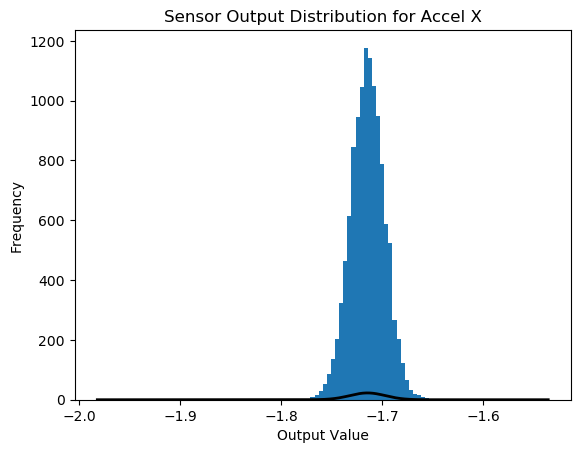

In [205]:
mu, std = norm.fit(stationary_data["linear_velocity_x"]) 
plt.hist(stationary_data["linear_velocity_x"], bins=100)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 400)
p = norm.pdf(x, mu, std)

plt.title("Sensor Output Distribution for Accel X")
plt.xlabel("Output Value")
plt.ylabel("Frequency")
plt.plot(x, p, 'k', linewidth=2)
  
plt.show()
plt.show()

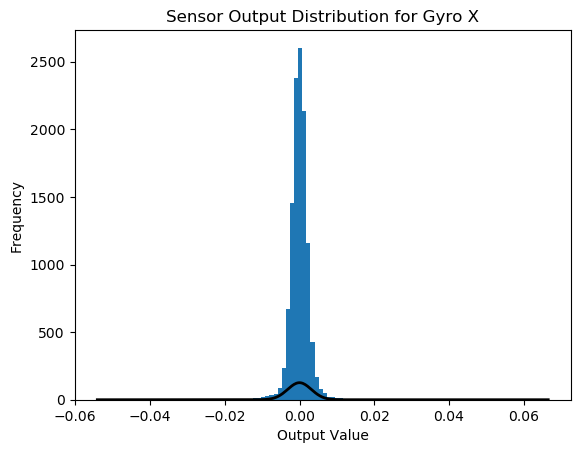

In [203]:
mu, std = norm.fit(stationary_data["angular_velocity_x"]) 
plt.hist(stationary_data["angular_velocity_x"], bins=100)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 400)
p = norm.pdf(x, mu, std)

plt.title("Sensor Output Distribution for Gyro X")
plt.xlabel("Output Value")
plt.ylabel("Frequency")
plt.plot(x, p, 'k', linewidth=2)
  
plt.show()
plt.show()


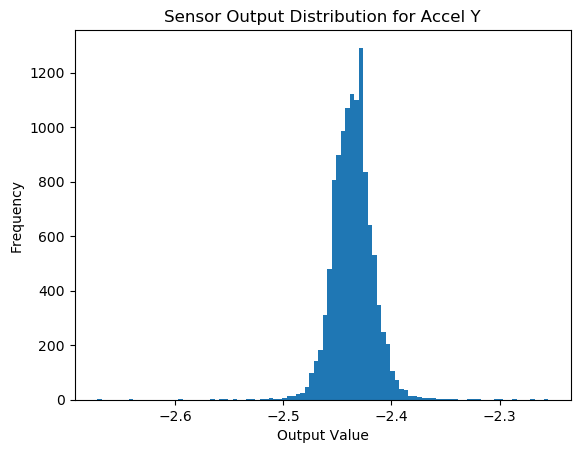

In [155]:
plt.hist(stationary_data["linear_velocity_y"], bins=100)
plt.title("Sensor Output Distribution for Accel Y")
plt.xlabel("Output Value")
plt.ylabel("Frequency")
plt.show()

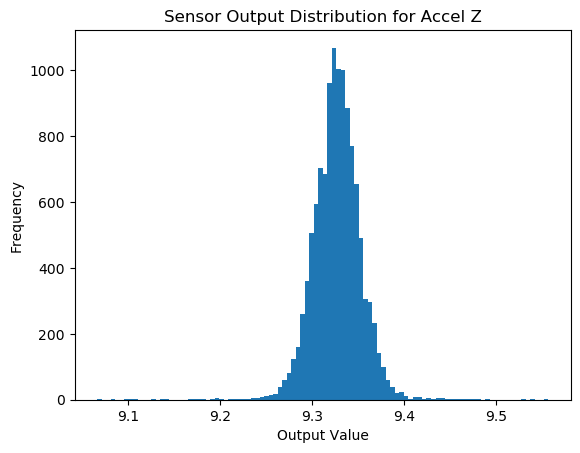

In [156]:
plt.hist(stationary_data["linear_velocity_z"], bins=100)
plt.title("Sensor Output Distribution for Accel Z")
plt.xlabel("Output Value")
plt.ylabel("Frequency")
plt.show()

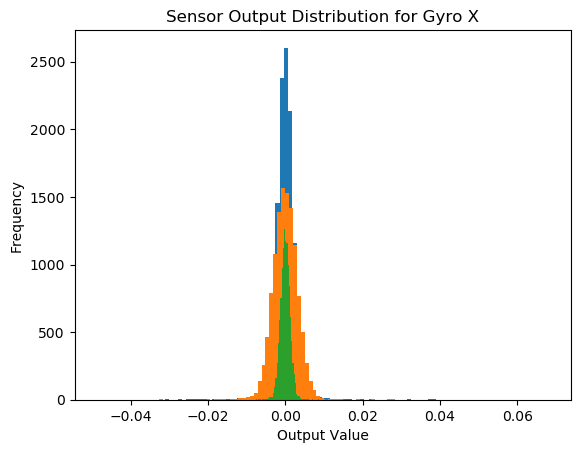

In [163]:
plt.hist(stationary_data["angular_velocity_x"], bins=100)
plt.hist(stationary_data["angular_velocity_y"], bins=100)
plt.hist(stationary_data["angular_velocity_z"], bins=100)
plt.title("Sensor Output Distribution for Gyro")
plt.xlabel("Output Value")
plt.ylabel("Frequency")
plt.show()

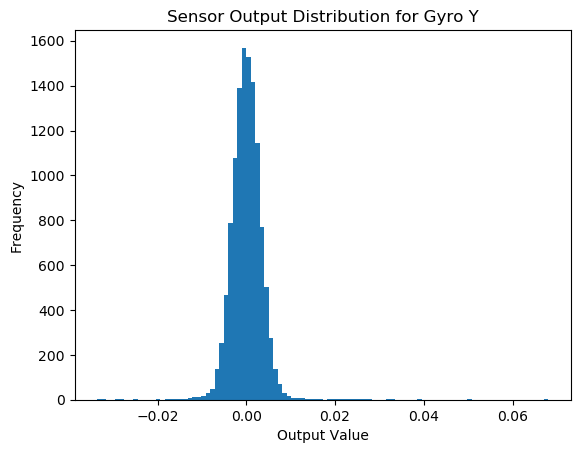

In [161]:
plt.hist(stationary_data["angular_velocity_y"], bins=100)
plt.title("Sensor Output Distribution for Gyro Y")
plt.xlabel("Output Value")
plt.ylabel("Frequency")
plt.show()

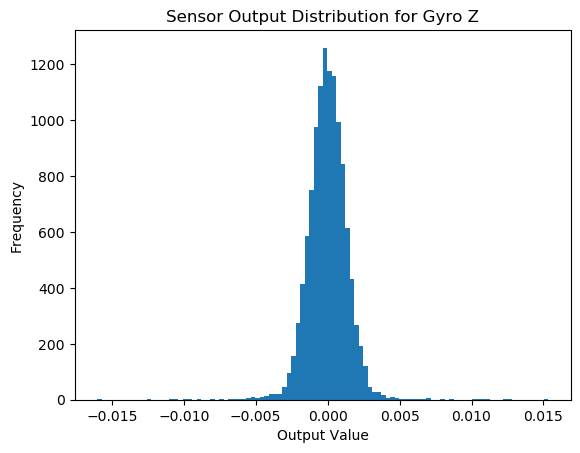

In [162]:
plt.hist(stationary_data["angular_velocity_z"], bins=100)
plt.title("Sensor Output Distribution for Gyro Z")
plt.xlabel("Output Value")
plt.ylabel("Frequency")
plt.show()

# gyro vs time

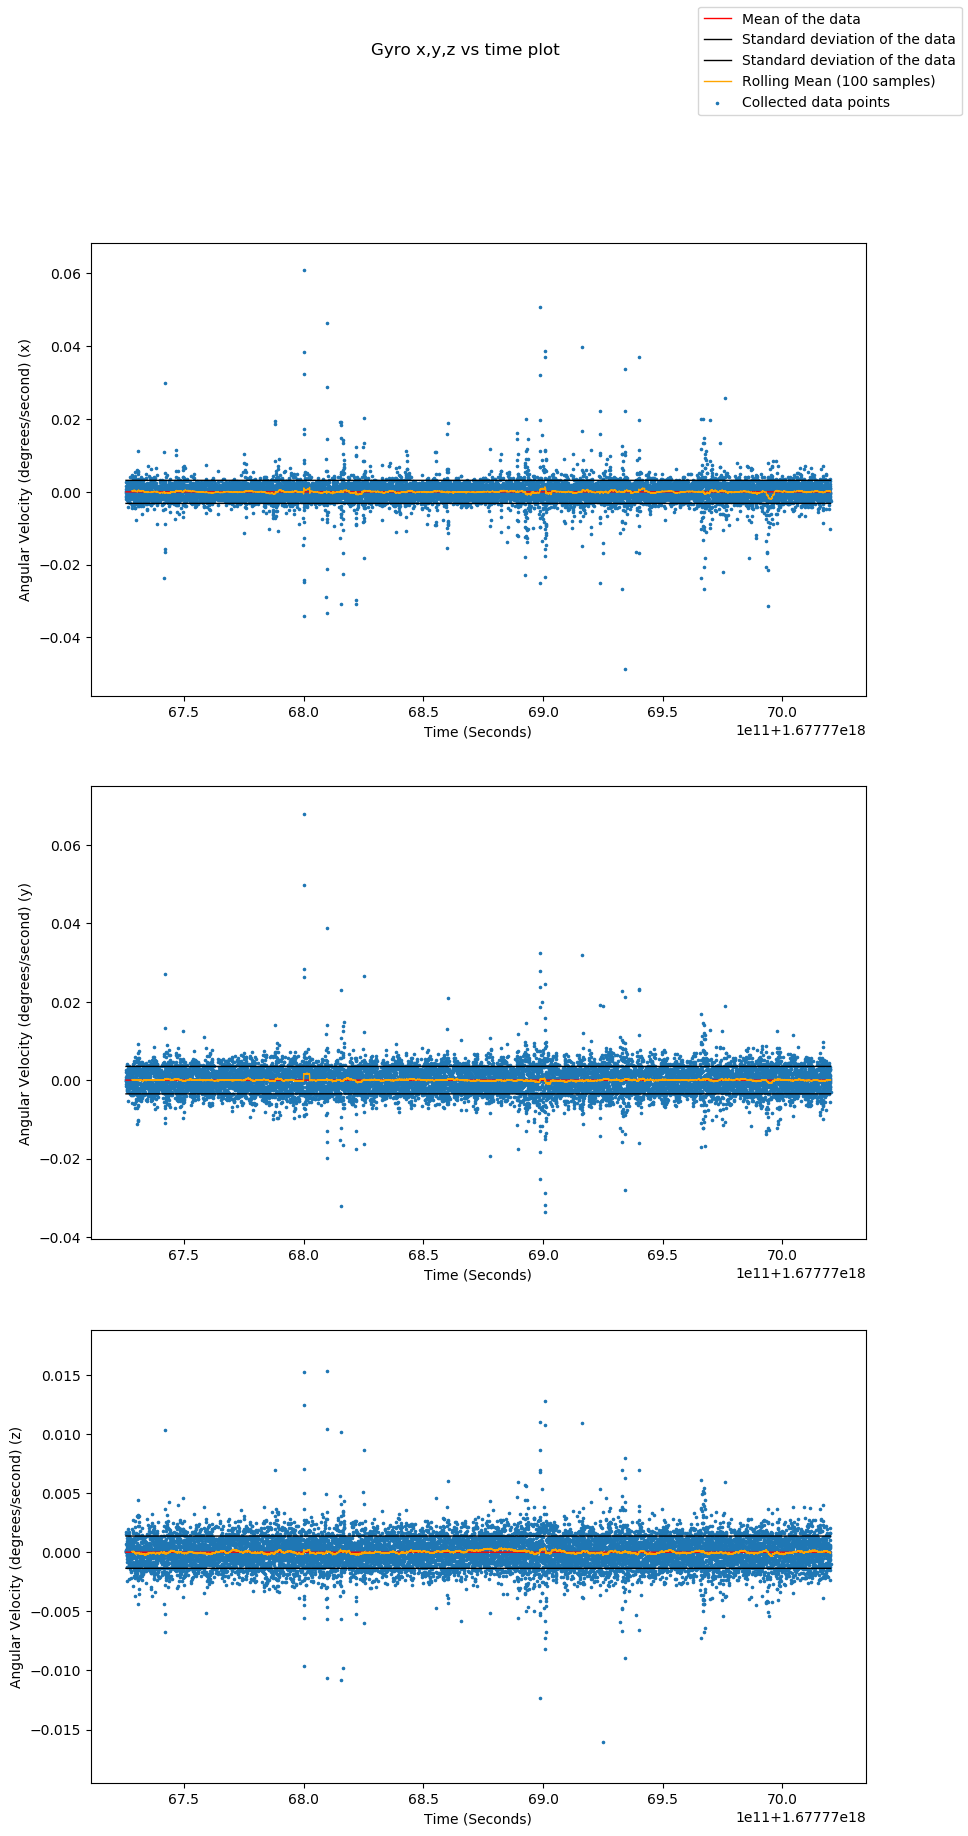

In [67]:
X = stationary_data[".Header.stamp.secs"]
Y_x = stationary_data["angular_velocity_x"]
Y_y = stationary_data["angular_velocity_y"]
Y_z = stationary_data["angular_velocity_z"]

Y_mean_x = np.mean(Y_x)*np.ones(np.shape(X))
Y_std_x = np.std(Y_x)

Y_mean_y = np.mean(Y_y)*np.ones(np.shape(X))
Y_std_y = np.std(Y_y)

Y_mean_z = np.mean(Y_z)*np.ones(np.shape(X))
Y_std_z = np.std(Y_z)


N = len(X)
Y_meanx2 = pd.Series(Y_x).rolling(window=100).mean().values
Y_meany2 = pd.Series(Y_y).rolling(window=100).mean().values
Y_meanz2 = pd.Series(Y_z).rolling(window=100).mean().values


fig, axs = plt.subplots(3, sharex=False, sharey=False,figsize=(10,20))

fig.suptitle('Gyro x,y,z vs time plot')


axs[0].scatter(X,Y_x, marker='.', s=10, label="Collected data points")
axs[0].plot(X, Y_mean_x, color='r', lw=1, label="Mean of the data")
axs[0].plot(X, Y_mean_x+Y_std_x, color='k', lw=1, label="Standard deviation of the data")
axs[0].plot(X, Y_mean_x-Y_std_x, color='k', lw=1, label="Standard deviation of the data")
axs[0].plot(X, Y_meanx2, color='orange', lw=1, label="Rolling Mean (100 samples)")


axs[1].scatter(X,Y_y, marker='.', s=10, label="Collected data points")
axs[1].plot(X, Y_mean_y, color='r', lw=1, label="Mean of the data")
axs[1].plot(X, Y_mean_y+Y_std_y, color='k', lw=1, label="Standard deviation of the data")
axs[1].plot(X, Y_mean_y-Y_std_y, color='k', lw=1, label="Standard deviation of the data")
axs[1].plot(X, Y_meany2, color='orange', lw=1, label="Rolling Mean (100 samples)")


axs[2].scatter(X,Y_z, marker='.', s=10, label="Collected data points")
axs[2].plot(X, Y_mean_z, color='r', lw=1, label="Mean of the data")
axs[2].plot(X, Y_mean_z+Y_std_z, color='k', lw=1, label="Standard deviation of the data")
axs[2].plot(X, Y_mean_z-Y_std_z, color='k', lw=1, label="Standard deviation of the data")
axs[2].plot(X, Y_meanz2, color='orange', lw=1, label="Rolling Mean (100 samples)")


axs[0].set_xlabel("Time (Seconds)")
axs[1].set_xlabel("Time (Seconds)")
axs[2].set_xlabel("Time (Seconds)")
axs[0].set_ylabel("Angular Velocity (degrees/second) (x)")
axs[1].set_ylabel("Angular Velocity (degrees/second) (y)")
axs[2].set_ylabel("Angular Velocity (degrees/second) (z)")

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

# Allan variance

# N : angle random walk
# K : rate random walk
# B : bias instability

In [ ]:
def _compute_cluster_sizes(n_samples, dt, tau_min, tau_max, n_clusters):
    if tau_min is None:
        min_size = 1
    else:
        min_size = int(tau_min / dt)

    if tau_max is None:
        max_size = n_samples // 10
    else:
        max_size = int(tau_max / dt)

    result = np.logspace(np.log2(min_size), np.log2(max_size),
                         num=n_clusters, base=2)

    return np.unique(np.round(result)).astype(int)

In [ ]:
def allan_variance(x, dt=1, tau_min=None, tau_max=None,
                   n_clusters=100, input_type='mean'):
    
    ALLOWED_INPUT_TYPES = ['mean', 'increment', 'integral']

    if input_type not in ALLOWED_INPUT_TYPES:
        raise ValueError("`input_type` must be one of {}."
                         .format(ALLOWED_INPUT_TYPES))

    x = np.asarray(x, dtype=float)
    if input_type == 'integral':
        X = x
    else:
        X = np.cumsum(x, axis=0)

    cluster_sizes = _compute_cluster_sizes(len(x), dt, tau_min, tau_max,
                                           n_clusters)

    avar = np.empty(cluster_sizes.shape + X.shape[1:])
    for i, k in enumerate(cluster_sizes):
        c = X[2*k:] - 2 * X[k:-k] + X[:-2*k]
        avar[i] = np.mean(c**2, axis=0) / k / k

    if input_type == 'mean':
        avar *= 0.5
    else:
        avar *= 0.5 / dt**2

    return cluster_sizes * dt, avar

In [152]:
def params_from_avar(tau, avar, effects=None, sensor_names=None):
    ALLOWED_EFFECTS = ['quantization', 'N: angle_random_walk', 'B: bias_instability', 'K: rate_random_walk', 'ramp']

    avar = np.asarray(avar)
    single_series = avar.ndim == 1
    if single_series:
        avar = avar[:, None]

    if effects is None:
        effects = ALLOWED_EFFECTS
    elif not set(effects) <= set(ALLOWED_EFFECTS):
        raise ValueError("Unknown effects are passed.")

    n = len(tau)

    A = np.empty((n, 5))
    A[:, 0] = 3 / tau**2
    A[:, 1] = 1 / tau
    A[:, 2] = 2 * np.log(2) / np.pi
    A[:, 3] = tau / 3
    A[:, 4] = tau**2 / 2
    mask = ['quantization' in effects,
            'N: angle_random_walk' in effects,
            'B: bias_instability' in effects,
            'K: rate_random_walk' in effects,
            'ramp' in effects]

    A = A[:, mask]
    effects = np.asarray(ALLOWED_EFFECTS)[mask]

    params = []
    prediction = []

    for column in range(avar.shape[1]):
        avar_single = avar[:, column]
        A_scaled = A / avar_single[:, None]
        x = nnls(A_scaled, np.ones(n))[0]
        prediction.append(A_scaled.dot(x) * avar_single)
        params.append(np.sqrt(x))

    params = np.asarray(params)
    prediction = np.asarray(prediction).T

    params = pd.DataFrame(params, index=sensor_names, columns=effects)

    if single_series:
        params = params.iloc[0]
        prediction = prediction[:, 0]

    return params, prediction

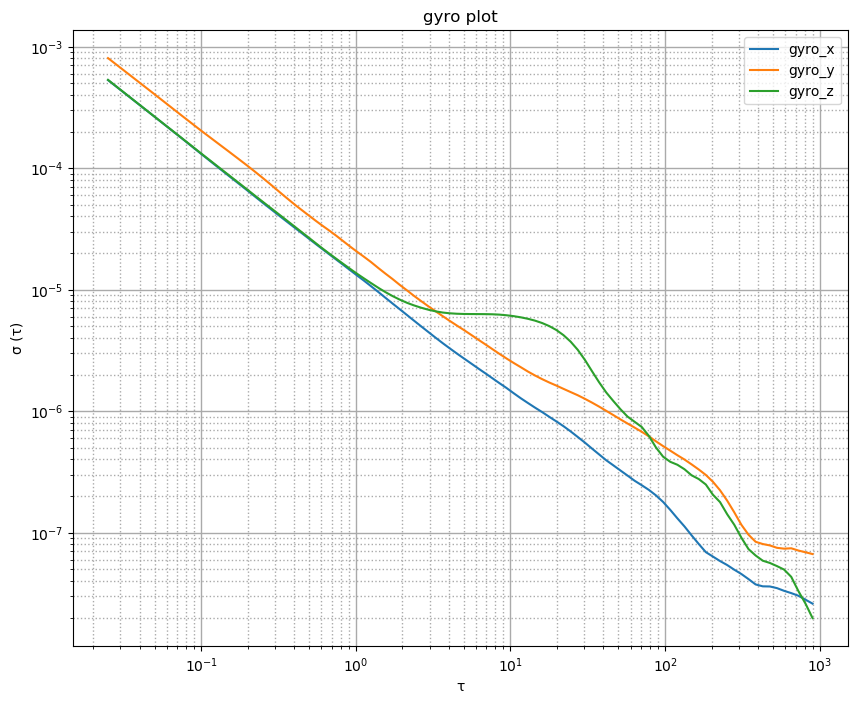

In [137]:
tau = [0]*6
av = [0]*6

for i, var in enumerate(["angular_velocity_x", "angular_velocity_y", "angular_velocity_z", "linear_velocity_x", "linear_velocity_y", "linear_velocity_z"]):
		tau[i], av[i] = allan_variance(five_hr[var], 0.025, input_type='increment')
		# param, Y_pred = params_from_avar(tau, av)

fig = plt.figure(figsize=(10, 8), dpi=100)
ax = fig.add_subplot()
ax.grid(which='major', color='#AAAAAA', linewidth=1)
ax.grid(which='minor', color='#AAAAAA', linestyle=':', linewidth=1)
ax.minorticks_on()
ax.grid(True)

for X, Y,j in zip(tau[:3], av[:3],["gyro_x", "gyro_y", "gyro_z"]):
	ax.loglog(X,Y, label=f"{j}")

ax.set_title("gyro plot")
ax.set_xlabel("\u03C4")
ax.set_ylabel("\u03C3 (\u03C4)")

ax.legend()
plt.show()

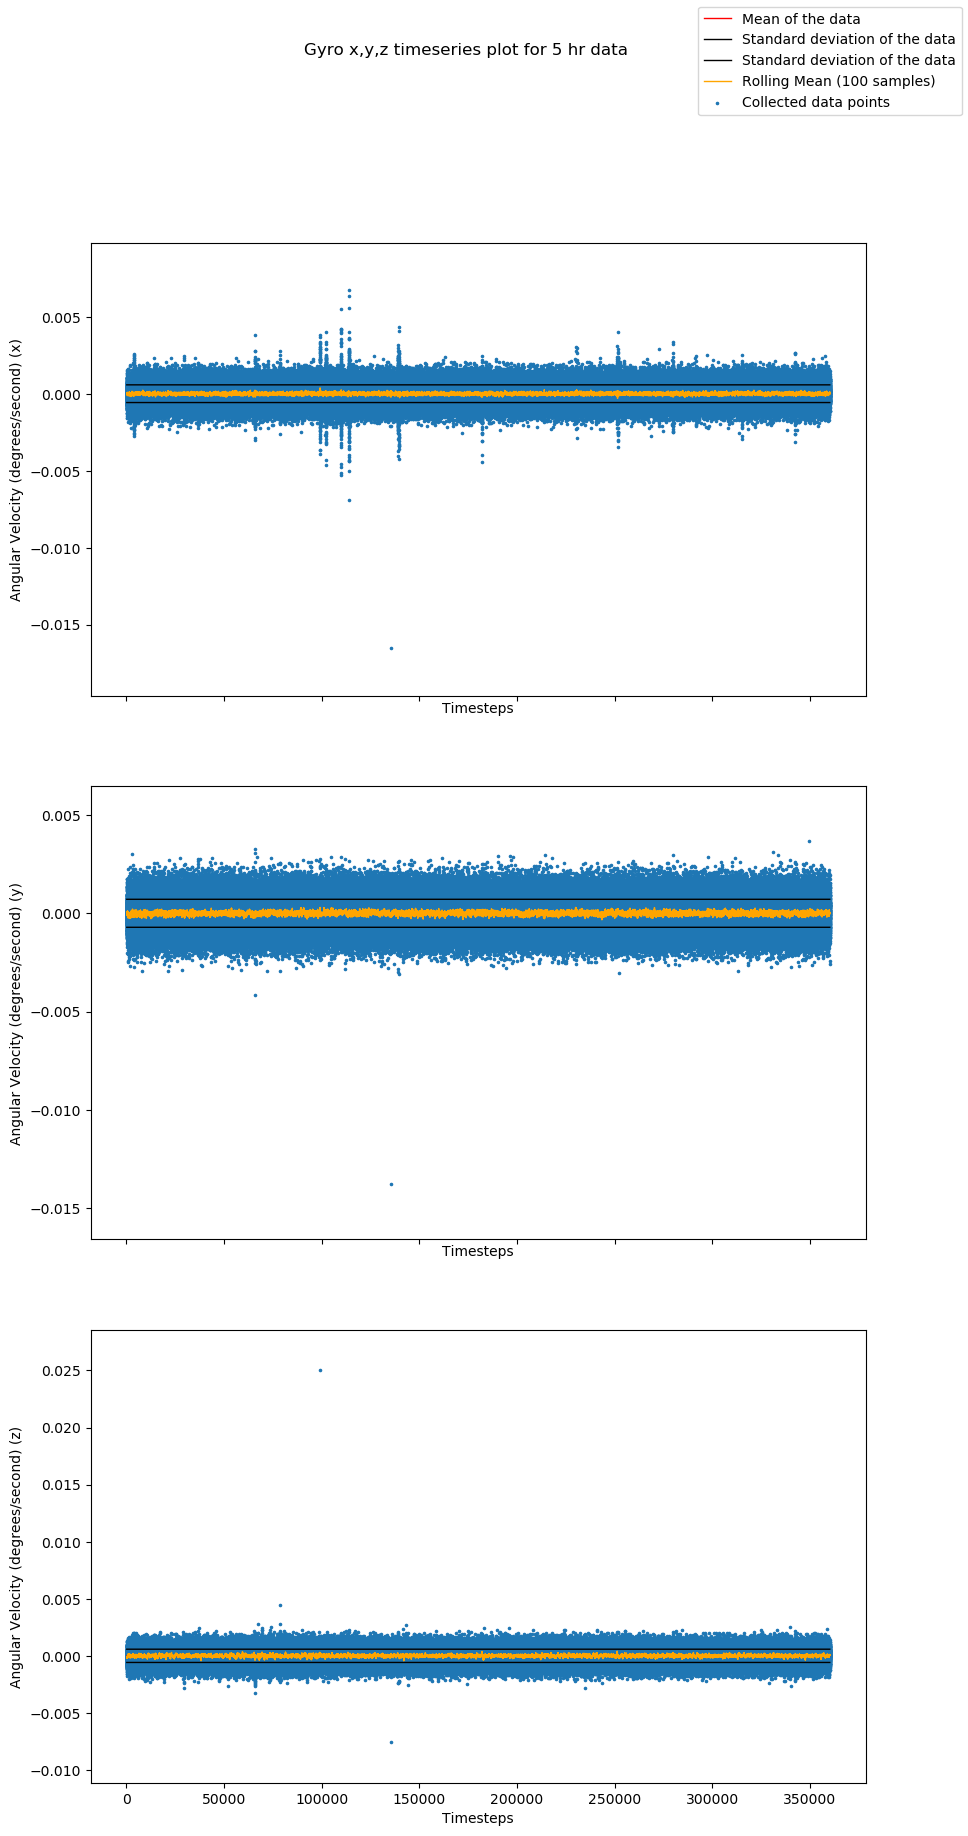

In [144]:
X = five_hr[".Header.stamp.secs"]
Y_x = five_hr["angular_velocity_x"]
Y_y = five_hr["angular_velocity_y"]
Y_z = five_hr["angular_velocity_z"]

Y_mean_x = np.mean(Y_x)*np.ones(np.shape(X))
Y_std_x = np.std(Y_x)

Y_mean_y = np.mean(Y_y)*np.ones(np.shape(X))
Y_std_y = np.std(Y_y)

Y_mean_z = np.mean(Y_z)*np.ones(np.shape(X))
Y_std_z = np.std(Y_z)


N = len(X)
Y_meanx2 = pd.Series(Y_x).rolling(window=100).mean().values
Y_meany2 = pd.Series(Y_y).rolling(window=100).mean().values
Y_meanz2 = pd.Series(Y_z).rolling(window=100).mean().values


fig, axs = plt.subplots(3, sharex=True, sharey=False,figsize=(10,20))

fig.suptitle('Gyro x,y,z timeseries plot for 5 hr data')


axs[0].scatter(X,Y_x, marker='.', s=10, label="Collected data points")
axs[0].plot(X, Y_mean_x, color='r', lw=1, label="Mean of the data")
axs[0].plot(X, Y_mean_x+Y_std_x, color='k', lw=1, label="Standard deviation of the data")
axs[0].plot(X, Y_mean_x-Y_std_x, color='k', lw=1, label="Standard deviation of the data")
axs[0].plot(X, Y_meanx2, color='orange', lw=1, label="Rolling Mean (100 samples)")


axs[1].scatter(X,Y_y, marker='.', s=10, label="Collected data points")
axs[1].plot(X, Y_mean_y, color='r', lw=1, label="Mean of the data")
axs[1].plot(X, Y_mean_y+Y_std_y, color='k', lw=1, label="Standard deviation of the data")
axs[1].plot(X, Y_mean_y-Y_std_y, color='k', lw=1, label="Standard deviation of the data")
axs[1].plot(X, Y_meany2, color='orange', lw=1, label="Rolling Mean (100 samples)")


axs[2].scatter(X,Y_z, marker='.', s=10, label="Collected data points")
axs[2].plot(X, Y_mean_z, color='r', lw=1, label="Mean of the data")
axs[2].plot(X, Y_mean_z+Y_std_z, color='k', lw=1, label="Standard deviation of the data")
axs[2].plot(X, Y_mean_z-Y_std_z, color='k', lw=1, label="Standard deviation of the data")
axs[2].plot(X, Y_meanz2, color='orange', lw=1, label="Rolling Mean (100 samples)")


axs[0].set_xlabel("Timesteps")
axs[1].set_xlabel("Timesteps")
axs[2].set_xlabel("Timesteps")
axs[0].set_ylabel("Angular Velocity (degrees/second) (x)")
axs[1].set_ylabel("Angular Velocity (degrees/second) (y)")
axs[2].set_ylabel("Angular Velocity (degrees/second) (z)")

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

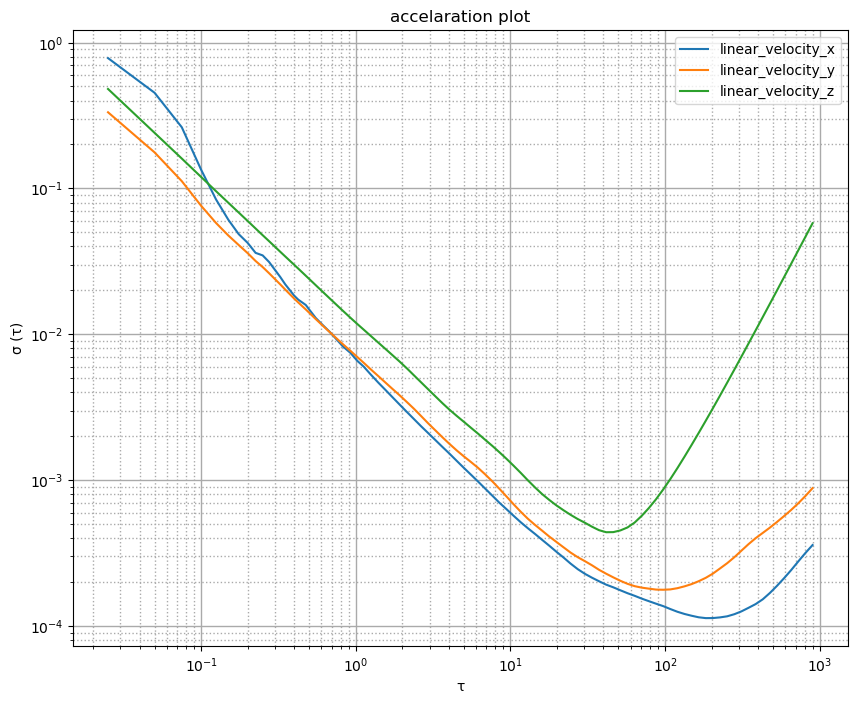

In [324]:
fig = plt.figure(figsize=(10, 8), dpi=100)
ax = fig.add_subplot()
ax.grid(which='major', color='#AAAAAA', linewidth=1)
ax.grid(which='minor', color='#AAAAAA', linestyle=':', linewidth=1)
ax.minorticks_on()
ax.grid(True)

for X, Y,j in zip(tau[3:], av[3:],["linear_velocity_x", "linear_velocity_y", "linear_velocity_z"]):
	ax.loglog(X,Y, label=f"{j}")

ax.set_title("accelaration plot")
ax.set_xlabel("\u03C4")
ax.set_ylabel("\u03C3 (\u03C4)")

ax.legend()
plt.show()

In [150]:
tau_w_x, av_w_x = allan_variance(five_hr["angular_velocity_x"], 0.025, input_type='increment')
tau_w_y, av_w_y = allan_variance(five_hr["angular_velocity_y"], 0.025, input_type='increment')
tau_w_z, av_w_z = allan_variance(five_hr["angular_velocity_z"], 0.025, input_type='increment')
tau_a_x, av_a_x = allan_variance(five_hr["linear_velocity_x"], 0.025, input_type='increment')
tau_a_y, av_a_y = allan_variance(five_hr["linear_velocity_y"], 0.025, input_type='increment')
tau_a_z, av_a_z = allan_variance(five_hr["linear_velocity_z"], 0.025, input_type='increment')

In [325]:
params_w_x, av_pred_w_x = params_from_avar(tau_w_x, av_w_x)
params_w_y, av_pred_w_y = params_from_avar(tau_w_y, av_w_y)
params_w_z, av_pred_w_z = params_from_avar(tau_w_z, av_w_z)
params_a_x, av_pred_a_x = params_from_avar(tau_a_x, av_a_x)
params_a_y, av_pred_a_y = params_from_avar(tau_a_y, av_a_y)
params_a_z, av_pred_a_z = params_from_avar(tau_a_z, av_a_z)

In [326]:
params_w_x[1:4], params_w_y[1:4], params_w_z[1:4]

(N: angle_random_walk    0.003731
 B: bias_instability     0.000082
 K: rate_random_walk     0.000000
 Name: 0, dtype: float64,
 N: angle_random_walk    0.004831
 B: bias_instability     0.000321
 K: rate_random_walk     0.000000
 Name: 0, dtype: float64,
 N: angle_random_walk    0.00410
 B: bias_instability     0.00018
 K: rate_random_walk     0.00000
 Name: 0, dtype: float64)

# Group Data

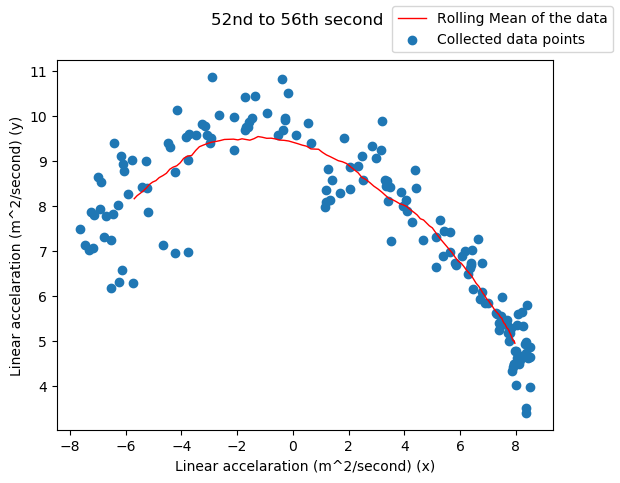

In [323]:
# X = group_data[".Header.stamp.secs"][:800]
# Y_x = group_data[".imu.linear_accelaration.x"][:800]
# Y_y = group_data[".imu.linear_accelaration.y"][:800]
# Y_z = group_data[".imu.linear_accelaration.z"][:800]

# X = group_data[".Header.stamp.secs"][960:2000]
# Y_x = group_data[".imu.linear_accelaration.x"][960:2000]
# Y_y = group_data[".imu.linear_accelaration.y"][960:2000]
# Y_z = group_data[".imu.linear_accelaration.z"][960:2000]

X = group_data[".Header.stamp.secs"][2080:2240]
Y_x = group_data[".imu.linear_accelaration.x"][2080:2240]
Y_y = group_data[".imu.linear_accelaration.y"][2080:2240]
Y_z = group_data[".imu.linear_accelaration.z"][2080:2240]

Y_mean_x = np.mean(Y_x)*np.ones(np.shape(X))
Y_std_x = np.std(Y_x)

Y_mean_y = np.mean(Y_y)*np.ones(np.shape(X))
Y_std_y = np.std(Y_y)

Y_mean_z = np.mean(Y_z)*np.ones(np.shape(X))
Y_std_z = np.std(Y_z)


N = len(X)
Y_meanx2 = pd.Series(Y_x).rolling(window=40).mean().values
Y_meany2 = pd.Series(Y_y).rolling(window=40).mean().values
Y_meanz2 = pd.Series(Y_z).rolling(window=40).mean().values


# fig, axs = plt.subplots(3, sharex=True, sharey=False,figsize=(10,20))
fig, axs = plt.subplots()

# fig.suptitle('First 20 seconds')
fig.suptitle('52nd to 56th second')


axs.scatter(Y_x,Y_y,  label="Collected data points")
# axs.scatter(Y_y,Y_z,  label="Collected data points")
# axs.plot(X,Y_y,  label="Collected data points")
# axs.plot(X,Y_z,  label="Collected data points")
# axs.plot(Y_z,X,  label="Collected data points")
axs.plot(Y_meanx2, Y_meany2, color='r', lw=1, label="Rolling Mean of the data")
# axs.plot(Y_meany2, Y_meanz2, color='r', lw=1, label="Rolling Mean of the data")
# axs[0].plot(X, Y_mean_x+Y_std_x, color='k', lw=1, label="Standard deviation of the data")
# axs[0].plot(X, Y_mean_x-Y_std_x, color='k', lw=1, label="Standard deviation of the data")
# axs[0].plot(X, Y_meanx2, color='orange', lw=1, label="Rolling Mean (100 samples)")


# axs.plot(X,Y_y, label="Collected data points")
# axs[1].plot(X, Y_mean_y, color='r', lw=1, label="Mean of the data")
# axs[1].plot(X, Y_mean_y+Y_std_y, color='k', lw=1, label="Standard deviation of the data")
# axs[1].plot(X, Y_mean_y-Y_std_y, color='k', lw=1, label="Standard deviation of the data")
# axs[1].plot(X, Y_meany2, color='orange', lw=1, label="Rolling Mean (100 samples)")


# axs.plot(X,Y_z, label="Collected data points")
# axs[2].plot(X, Y_mean_z, color='r', lw=1, label="Mean of the data")
# axs[2].plot(X, Y_mean_z+Y_std_z, color='k', lw=1, label="Standard deviation of the data")
# axs[2].plot(X, Y_mean_z-Y_std_z, color='k', lw=1, label="Standard deviation of the data")
# axs[2].plot(X, Y_meanz2, color='orange', lw=1, label="Rolling Mean (100 samples)")


axs.set_xlabel("Linear accelaration (m^2/second) (x)")
# # axs[1].set_xlabel("Timesteps")
# # axs[2].set_xlabel("Timesteps")
axs.set_ylabel("Linear accelaration (m^2/second) (y)")
# axs.set_xlabel("Linear accelaration (m^2/second) (x)")
# axs.set_ylabel("Linear accelaration (m^2/second) (y)")
# axs.set_xlabel("Linear accelaration (m^2/second) (y)")
# axs.set_ylabel("Linear accelaration (m^2/second) (z)")
# axs[1].set_ylabel("Angular Velocity (degrees/second) (y)")
# axs[2].set_ylabel("Angular Velocity (degrees/second) (z)")

handles, labels = axs.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

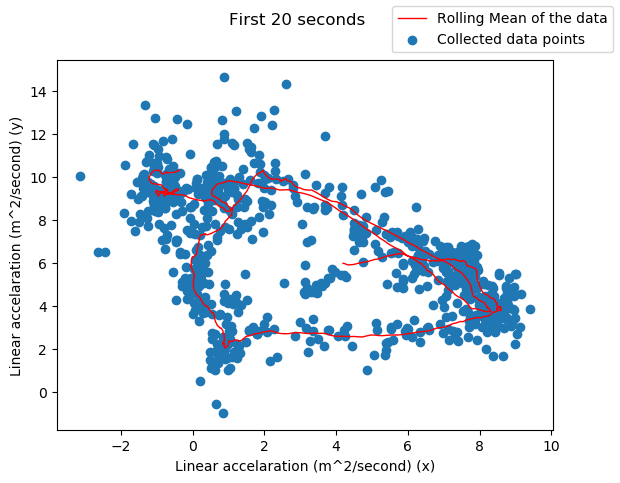

In [321]:
X = group_data[".Header.stamp.secs"][:800]
Y_x = group_data[".imu.linear_accelaration.x"][:800]
Y_y = group_data[".imu.linear_accelaration.y"][:800]
Y_z = group_data[".imu.linear_accelaration.z"][:800]

# X = group_data[".Header.stamp.secs"][960:2000]
# Y_x = group_data[".imu.linear_accelaration.x"][960:2000]
# Y_y = group_data[".imu.linear_accelaration.y"][960:2000]
# Y_z = group_data[".imu.linear_accelaration.z"][960:2000]

# X = group_data[".Header.stamp.secs"][2080:2240]
# Y_x = group_data[".imu.linear_accelaration.x"][2080:2240]
# Y_y = group_data[".imu.linear_accelaration.y"][2080:2240]
# Y_z = group_data[".imu.linear_accelaration.z"][2080:2240]

Y_mean_x = np.mean(Y_x)*np.ones(np.shape(X))
Y_std_x = np.std(Y_x)

Y_mean_y = np.mean(Y_y)*np.ones(np.shape(X))
Y_std_y = np.std(Y_y)

Y_mean_z = np.mean(Y_z)*np.ones(np.shape(X))
Y_std_z = np.std(Y_z)


N = len(X)
Y_meanx2 = pd.Series(Y_x).rolling(window=40).mean().values
Y_meany2 = pd.Series(Y_y).rolling(window=40).mean().values
Y_meanz2 = pd.Series(Y_z).rolling(window=40).mean().values


# fig, axs = plt.subplots(3, sharex=True, sharey=False,figsize=(10,20))
fig, axs = plt.subplots()

fig.suptitle('First 20 seconds')
# fig.suptitle('52nd to 56th second')


axs.scatter(Y_x,Y_y,  label="Collected data points")
# axs.scatter(Y_y,Y_z,  label="Collected data points")
# axs.plot(X,Y_y,  label="Collected data points")
# axs.plot(X,Y_z,  label="Collected data points")
# axs.plot(Y_z,X,  label="Collected data points")
axs.plot(Y_meanx2, Y_meany2, color='r', lw=1, label="Rolling Mean of the data")
# axs.plot(Y_meany2, Y_meanz2, color='r', lw=1, label="Rolling Mean of the data")
# axs[0].plot(X, Y_mean_x+Y_std_x, color='k', lw=1, label="Standard deviation of the data")
# axs[0].plot(X, Y_mean_x-Y_std_x, color='k', lw=1, label="Standard deviation of the data")
# axs[0].plot(X, Y_meanx2, color='orange', lw=1, label="Rolling Mean (100 samples)")


# axs.plot(X,Y_y, label="Collected data points")
# axs[1].plot(X, Y_mean_y, color='r', lw=1, label="Mean of the data")
# axs[1].plot(X, Y_mean_y+Y_std_y, color='k', lw=1, label="Standard deviation of the data")
# axs[1].plot(X, Y_mean_y-Y_std_y, color='k', lw=1, label="Standard deviation of the data")
# axs[1].plot(X, Y_meany2, color='orange', lw=1, label="Rolling Mean (100 samples)")


# axs.plot(X,Y_z, label="Collected data points")
# axs[2].plot(X, Y_mean_z, color='r', lw=1, label="Mean of the data")
# axs[2].plot(X, Y_mean_z+Y_std_z, color='k', lw=1, label="Standard deviation of the data")
# axs[2].plot(X, Y_mean_z-Y_std_z, color='k', lw=1, label="Standard deviation of the data")
# axs[2].plot(X, Y_meanz2, color='orange', lw=1, label="Rolling Mean (100 samples)")


axs.set_xlabel("Linear accelaration (m^2/second) (x)")
# # axs[1].set_xlabel("Timesteps")
# # axs[2].set_xlabel("Timesteps")
axs.set_ylabel("Linear accelaration (m^2/second) (y)")
# axs.set_xlabel("Linear accelaration (m^2/second) (x)")
# axs.set_ylabel("Linear accelaration (m^2/second) (y)")
# axs.set_xlabel("Linear accelaration (m^2/second) (y)")
# axs.set_ylabel("Linear accelaration (m^2/second) (z)")
# axs[1].set_ylabel("Angular Velocity (degrees/second) (y)")
# axs[2].set_ylabel("Angular Velocity (degrees/second) (z)")

handles, labels = axs.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

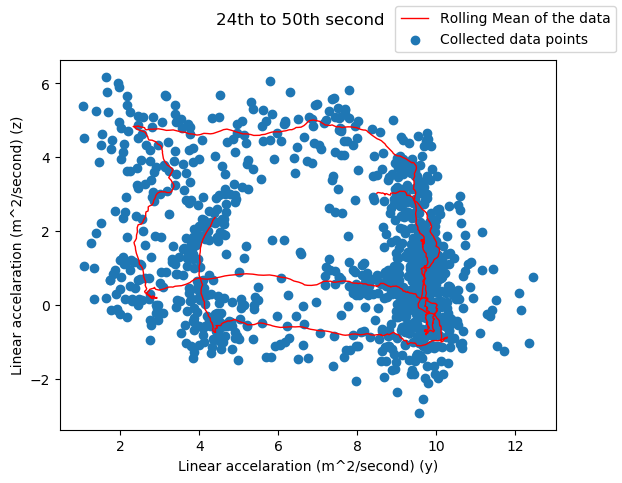

In [322]:
# X = group_data[".Header.stamp.secs"][:800]
# Y_x = group_data[".imu.linear_accelaration.x"][:800]
# Y_y = group_data[".imu.linear_accelaration.y"][:800]
# Y_z = group_data[".imu.linear_accelaration.z"][:800]

X = group_data[".Header.stamp.secs"][960:2000]
Y_x = group_data[".imu.linear_accelaration.x"][960:2000]
Y_y = group_data[".imu.linear_accelaration.y"][960:2000]
Y_z = group_data[".imu.linear_accelaration.z"][960:2000]

# X = group_data[".Header.stamp.secs"][2080:2240]
# Y_x = group_data[".imu.linear_accelaration.x"][2080:2240]
# Y_y = group_data[".imu.linear_accelaration.y"][2080:2240]
# Y_z = group_data[".imu.linear_accelaration.z"][2080:2240]

Y_mean_x = np.mean(Y_x)*np.ones(np.shape(X))
Y_std_x = np.std(Y_x)

Y_mean_y = np.mean(Y_y)*np.ones(np.shape(X))
Y_std_y = np.std(Y_y)

Y_mean_z = np.mean(Y_z)*np.ones(np.shape(X))
Y_std_z = np.std(Y_z)


N = len(X)
Y_meanx2 = pd.Series(Y_x).rolling(window=40).mean().values
Y_meany2 = pd.Series(Y_y).rolling(window=40).mean().values
Y_meanz2 = pd.Series(Y_z).rolling(window=40).mean().values


# fig, axs = plt.subplots(3, sharex=True, sharey=False,figsize=(10,20))
fig, axs = plt.subplots()

# fig.suptitle('First 20 seconds')
fig.suptitle('24th to 50th second')


# axs.scatter(Y_x,Y_y,  label="Collected data points")
axs.scatter(Y_y,Y_z,  label="Collected data points")
# axs.plot(X,Y_y,  label="Collected data points")
# axs.plot(X,Y_z,  label="Collected data points")
# axs.plot(Y_z,X,  label="Collected data points")
# axs.plot(Y_meanx2, Y_meany2, color='r', lw=1, label="Rolling Mean of the data")
axs.plot(Y_meany2, Y_meanz2, color='r', lw=1, label="Rolling Mean of the data")
# axs[0].plot(X, Y_mean_x+Y_std_x, color='k', lw=1, label="Standard deviation of the data")
# axs[0].plot(X, Y_mean_x-Y_std_x, color='k', lw=1, label="Standard deviation of the data")
# axs[0].plot(X, Y_meanx2, color='orange', lw=1, label="Rolling Mean (100 samples)")


# axs.plot(X,Y_y, label="Collected data points")
# axs[1].plot(X, Y_mean_y, color='r', lw=1, label="Mean of the data")
# axs[1].plot(X, Y_mean_y+Y_std_y, color='k', lw=1, label="Standard deviation of the data")
# axs[1].plot(X, Y_mean_y-Y_std_y, color='k', lw=1, label="Standard deviation of the data")
# axs[1].plot(X, Y_meany2, color='orange', lw=1, label="Rolling Mean (100 samples)")


# axs.plot(X,Y_z, label="Collected data points")
# axs[2].plot(X, Y_mean_z, color='r', lw=1, label="Mean of the data")
# axs[2].plot(X, Y_mean_z+Y_std_z, color='k', lw=1, label="Standard deviation of the data")
# axs[2].plot(X, Y_mean_z-Y_std_z, color='k', lw=1, label="Standard deviation of the data")
# axs[2].plot(X, Y_meanz2, color='orange', lw=1, label="Rolling Mean (100 samples)")


# axs.set_xlabel("Linear accelaration (m^2/second) (x)")
# # axs[1].set_xlabel("Timesteps")
# # axs[2].set_xlabel("Timesteps")
# axs.set_ylabel("Linear accelaration (m^2/second) (y)")
# axs.set_xlabel("Linear accelaration (m^2/second) (x)")
axs.set_xlabel("Linear accelaration (m^2/second) (y)")
# axs.set_xlabel("Linear accelaration (m^2/second) (y)")
axs.set_ylabel("Linear accelaration (m^2/second) (z)")
# axs[1].set_ylabel("Angular Velocity (degrees/second) (y)")
# axs[2].set_ylabel("Angular Velocity (degrees/second) (z)")

handles, labels = axs.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()